# A numerical 1D Schrödinger solution
Based on the method described in ... (I can't find original reference)
Here is a similar one, would be good to reconcile these two and publish to http://www.compadre.org/picup/

TODO: fix scaling of the potentials and wavefunctions.

In [46]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
N = 1000
x, dx = np.linspace(-1,1,N,retstep=True)
#dx = dx*0.1

In [194]:
# Finite square well
V = np.zeros(N)
V[:] = 1000
V[int(N/2 - N/6):int(N/2+N/6)] = 0

(-1.1, 1.1)

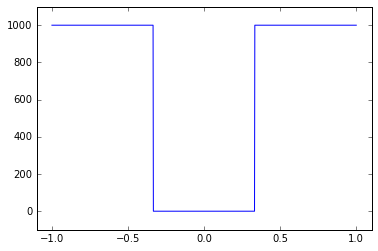

In [195]:
plt.plot(x,V)
plt.ylim(V.min() - 0.1*V.max(),V.max()*1.1)
plt.xlim(-1.1,1.1)

In [196]:
Hlower = np.diag(-1/dx**2 * np.ones(N)[:-1],k=-1)
Hupper = np.diag(-1/dx**2 * np.ones(N)[:-1],k=1)
Hmid = np.diag(2/dx**2 + V,k=0)

H = Hlower + Hmid + Hupper

In [197]:
energy, evecs = eigh(H,eigvals=(0,20))

In [198]:
states = [evecs[:,i] for i in range(20)]

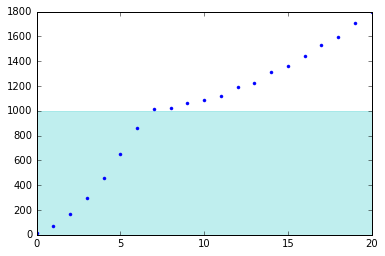

In [199]:
plt.plot(energy,".")
plt.fill_between(range(21),0,V.max(), color='c', alpha=0.25)  # Shade the bound states

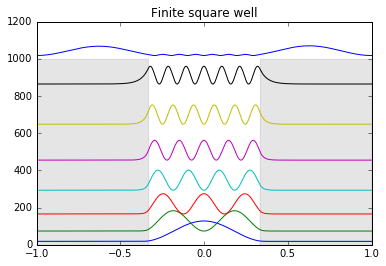

In [200]:
for i,state in enumerate(states[0:8]):
    # Make these plot at the height for a cool figure!
    plt.plot(x,state**2*20000 + energy[i])

plt.title("Finite square well")
plt.fill_between(x,0,V,color='k',alpha=0.1)  # shade in the potential well

## SHO

In [208]:
# Finite square well
V = 1000*x**2

(-1.1, 1.1)

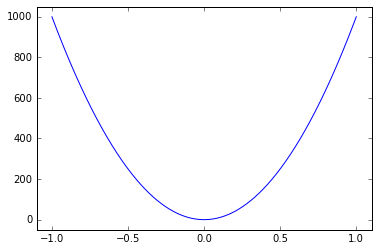

In [209]:
plt.plot(x,V)
plt.ylim(-50,1050)
plt.xlim(-1.1,1.1)

In [210]:
Hlower = np.diag(-1/dx**2 * np.ones(N)[:-1],k=-1)
Hupper = np.diag(-1/dx**2 * np.ones(N)[:-1],k=1)
Hmid = np.diag(2/dx**2 + V,k=0)

H = Hlower + Hmid + Hupper

In [211]:
energy, evecs = eigh(H,eigvals=(0,30))

In [212]:
states = [evecs[:,i] for i in range(30)]

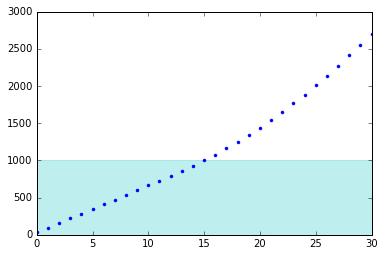

In [213]:
plt.plot(energy,".")
plt.fill_between(range(31),0,1000, color='c', alpha=0.25)

The bound states (below the cutoff) are clearly linear in energy (as expected), then above that we see the ∞-well solutions.

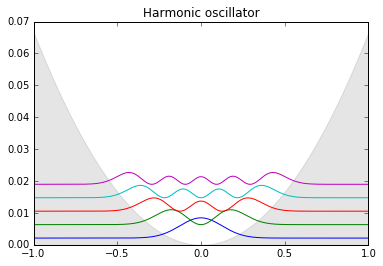

In [217]:
for i,state in enumerate(states[0:5]):
    # Make these plot at the height for a cool figure!
    plt.plot(x,state**2 + energy[i]/15000)

plt.title("Harmonic oscillator")
plt.fill_between(x,0,V/15000,color='k',alpha=0.1)

## Some other visualization tricks

In [218]:
from ggplot import *

In [219]:
import pandas as pd

In [220]:
states = pd.DataFrame(evecs[:,0:10],columns=["psi_{}".format(i) for i in range(10)])
states['x'] = pd.Series(x, index=states.index)
allstates = pd.melt(states, id_vars='x')

/Users/dawes/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


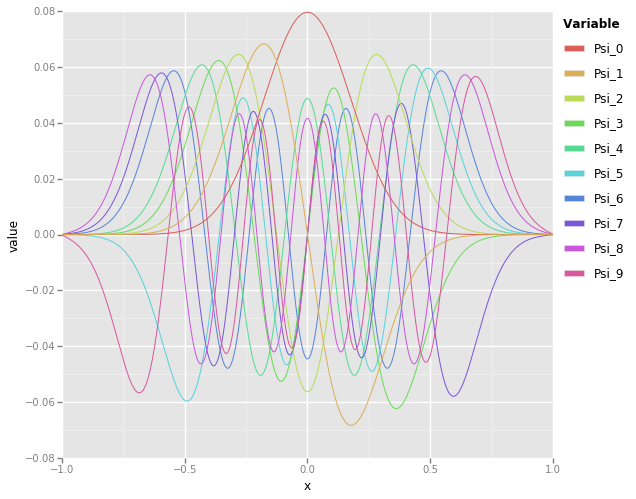

<ggplot: (302594515)>

In [221]:
ggplot(allstates,aes(x='x', y='value', color='variable')) + geom_line()

## Periodic wells:

In [320]:
N = 1000
x, dx = np.linspace(-1,1,N,retstep=True)
V = np.zeros(N)
# periodic wells
V[:] = 3000
L = N/14
S = N/10
a = N/4
for i in range(5):
    V[int(i*S+a):int(i*S+a+L)] = 0

(-1.1, 1.1)

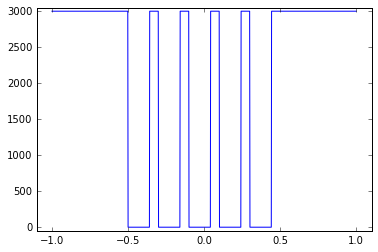

In [321]:
plt.plot(x,V)
plt.ylim(-50,3050)
plt.xlim(-1.1,1.1)

In [322]:
Hlower = np.diag(-1/dx**2 * np.ones(N)[:-1],k=-1)
Hupper = np.diag(-1/dx**2 * np.ones(N)[:-1],k=1)
Hmid = np.diag(2/dx**2 + V,k=0)

H = Hlower + Hmid + Hupper

In [323]:
energy, evecs = eigh(H,eigvals=(0,30))

In [324]:
states = [evecs[:,i] for i in range(30)]

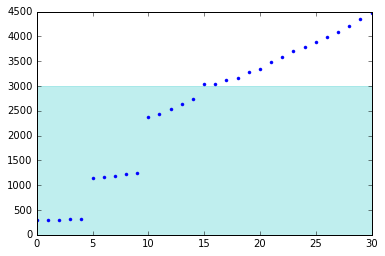

In [325]:
plt.plot(energy,".")
plt.fill_between(range(31),0,3000, color='c', alpha=0.25)

(0, 0.35)

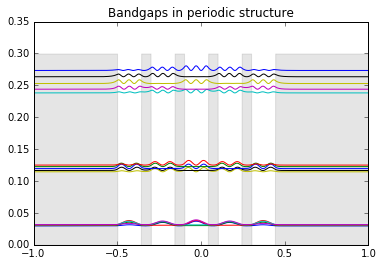

In [326]:
for i,state in enumerate(states[0:15]):
    # Make these plot at the height for a cool figure!
    plt.plot(x,state**2 + energy[i]/10000)
    
plt.fill_between(x,0,V/10000,color='k',alpha=0.1)
plt.title("Bandgaps in periodic structure")
plt.ylim(0,0.35)

## Bandgaps!